# Heart Disease Prediction

# Import Modules for Data Analysis

In [1]:
##import common modules for data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Data Collection and Processing

In [2]:
1#loading the csv data to a pandas dataframe
heart_data = pd.read_csv('dataset.csv')

In [3]:
 # print the first five rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [5]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## The features include: 

- **age**: Age of the patient
- **sex**: Sex of the patient (1 = male, 0 = female)
- **cp**: Chest pain type 
  - 1 = typical angina 
  - 2 = atypical angina 
  - 3 = non-anginal pain 
  - 4 = asymptomatic
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results 
  - 0 = normal 
  - 1 = having ST-T wave abnormality 
  - 2 = showing probable or definite left ventricular hypertrophy
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (1 = yes, 0 = no)
- **oldpeak**: ST refers to positions on an ECG plot. Oldpeak is a depression-related number that correlates positively with heart disease.
- **slope**: The slope of the peak exercise ST segment 
  - 1 = upsloping 
  - 2 = flat 
  - 3 = downsloping
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thalassemia 
  - 3 = normal 
  - 6 = fixed defect 
  - 7 = reversible defect
- **target**: The presence of heart disease (1 = heart disease, 0 = no heart disease)



In [6]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking the distribution of target variable 
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Splitting the features and target

In [9]:
X = heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [10]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### Splitting the data into training data and test data

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.25,random_state=23,shuffle= True )

In [14]:
[print(X.shape,X_train.shape,X_test.shape)]

(303, 13) (227, 13) (76, 13)


[None]

### Visualization


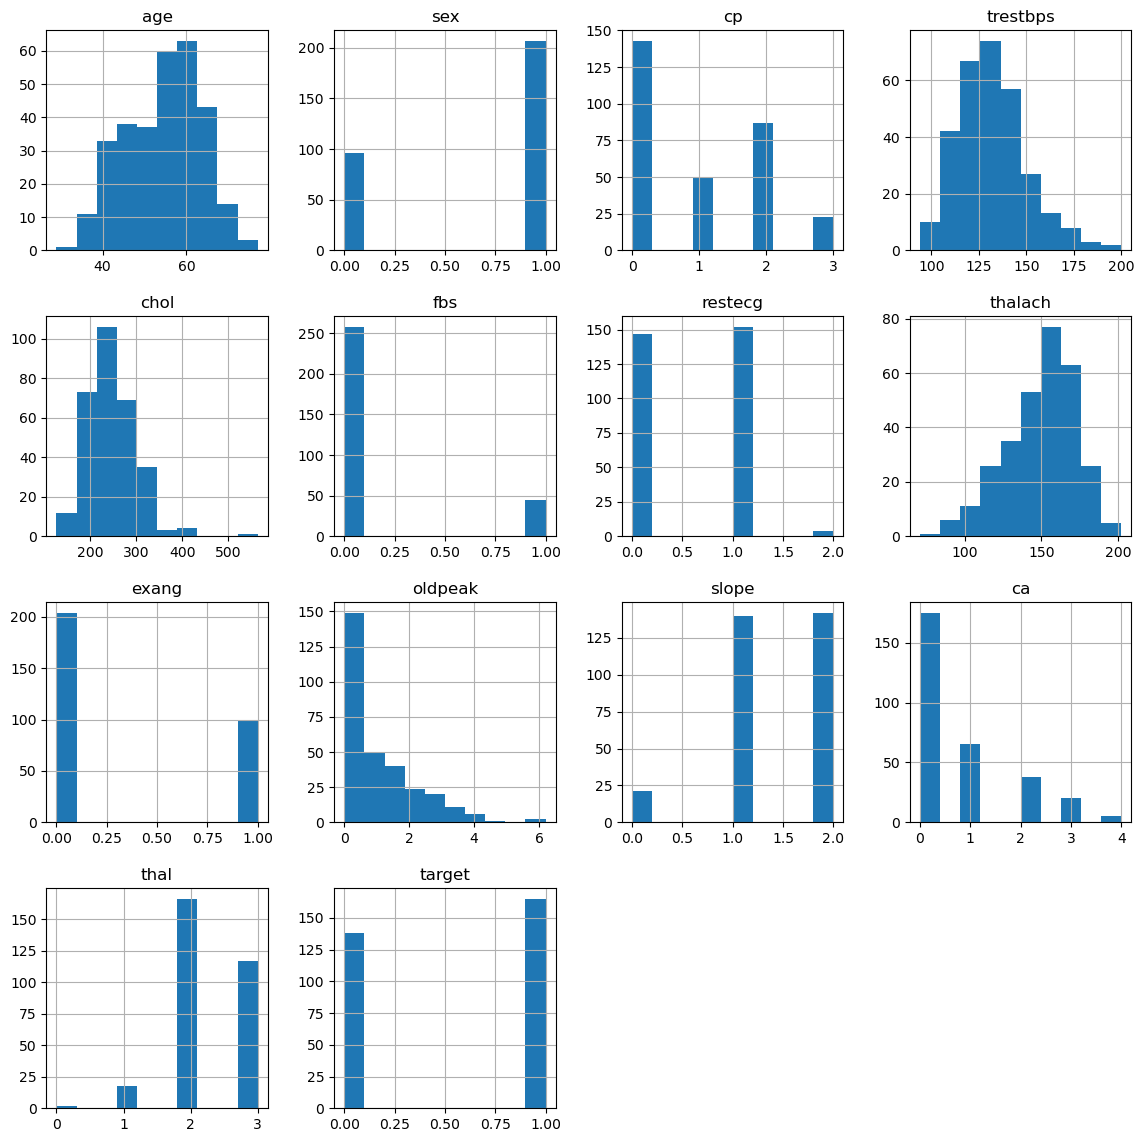

In [15]:
heart_data.hist(figsize=(14,14))
plt.show()

### The above histograms show the range of values for different variables


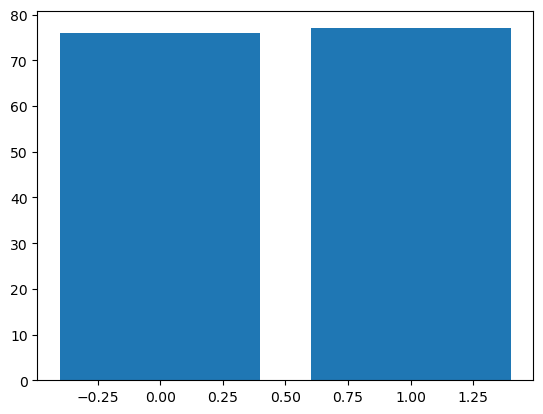

In [16]:
plt.bar(x = heart_data['sex'], height= heart_data['age'])
plt.show()

<AxesSubplot:xlabel='fbs', ylabel='target'>

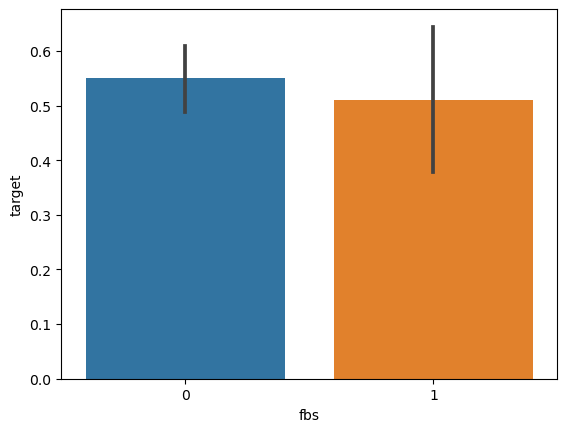

In [17]:
sns.barplot(x="fbs",y="target",data=heart_data)

### Fasted blood sugar responsible for heart disease for almost half the patients

<Axes: xlabel='sex', ylabel='age'>

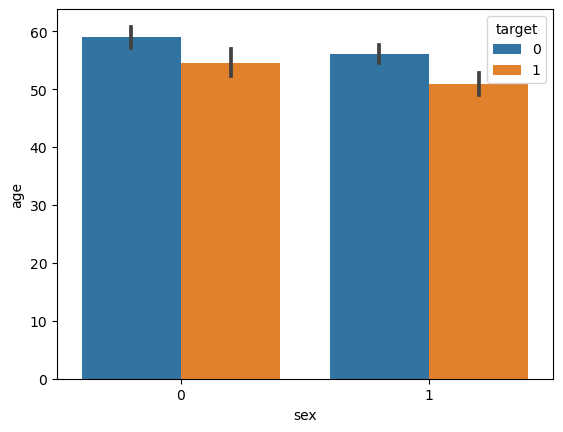

In [ ]:
sns.barplot(x=heart_data['sex'],y=heart_data['age'],hue=heart_data['target'])

### Gender related heart disease varies little with increased age.

In [18]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']

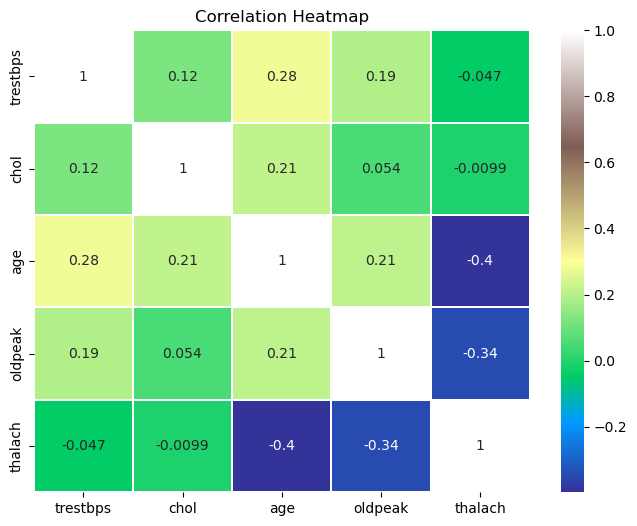

In [19]:
df = pd.DataFrame(heart_data)
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='terrain', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

## Inference :
- As age increases , thalach (persons maximum heart rate) decreases mildly.
- ST refers to positions on an ECG plot. Oldpeak is a depression-related number that correlates positively with heart disease.

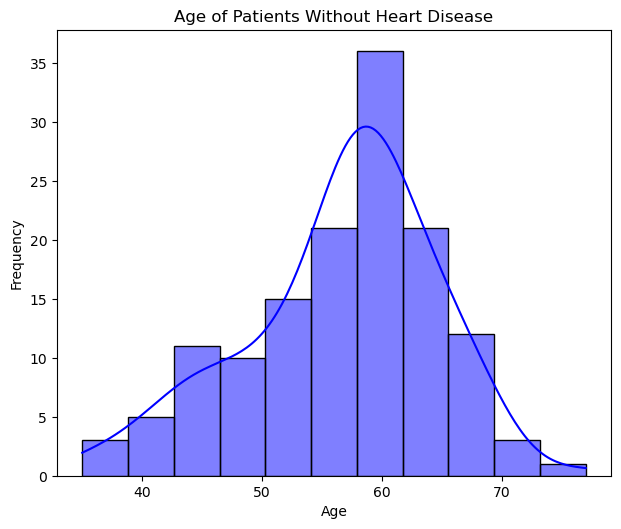

Text(0, 0.5, 'Frequency')

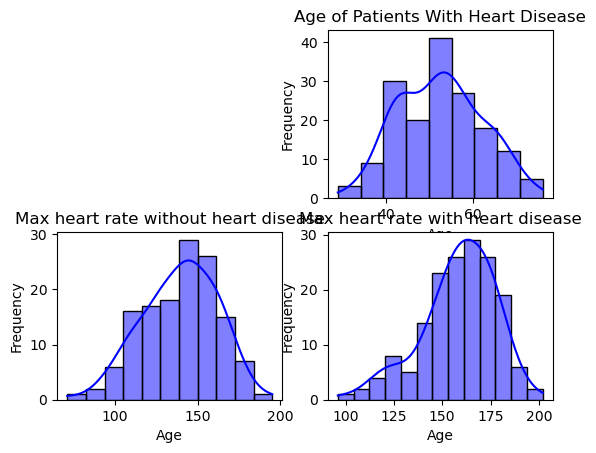

In [21]:
#create four histplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(df[df['target'] == 0]['age'], kde=True, color='blue')
plt.title('Age of Patients Without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.subplot(222)
sns.histplot(df[df['target'] == 1]['age'], kde=True, color='blue')
plt.title('Age of Patients With Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(223)
sns.histplot(df[df['target'] == 0]['thalach'], kde=True, color='blue')
plt.title('Max heart rate without heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(224)
sns.histplot(df[df['target'] == 1]['thalach'], kde=True, color='blue')
plt.title('Max heart rate with heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Here we will be experimenting with 2 classifiers

1. DecisionTree Classifier
2. KNeighbours Classifier

In [22]:
X_train.shape

(227, 13)

In [23]:
X_test.shape

(76, 13)

In [24]:
Y_test.shape

(76,)

In [25]:
Y_train.shape

(227,)

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7)

In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [28]:
prediction=dt.predict(X_test)

In [29]:
prediction

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [30]:
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [31]:
#accuracy score of decision tree
accuracy_dt 

81.57894736842105

In [ ]:
dt.feature_importances_

array([0.04929656, 0.02919666, 0.31925803, 0.03796498, 0.07808961,
       0.        , 0.05256981, 0.03649252, 0.02875964, 0.03634156,
       0.03631213, 0.1848333 , 0.11088519])

In [32]:
Category=["No you don't have heart disease", "Yes you have heart disease"]

In [34]:
# Dummy data for prediction
custom_data=np.array([[52,1,2,172,199,1,1,162,0,0.5,2,0,2]])

In [35]:
custom_data_prediction_dt=dt.predict(custom_data)

c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
custom_data_prediction_dt

array([1], dtype=int64)

In [38]:
print(Category[int(custom_data_prediction_dt)])

Yes you have heart disease


## KNN classifier Algorithm

In [39]:
from sklearn.neighbors import KNeighborsClassifier

Knn=KNeighborsClassifier(n_neighbors=7)
Knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
prediction_knn=Knn.predict(X_test)

c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
accuracy_Knn=accuracy_score(Y_test,prediction)*100

In [42]:
accuracy_Knn

81.57894736842105

In [43]:
custom_data_Knn=np.array([[52,1,2,172,199,1,1,162,0,0.5,2,0,2]])

In [44]:
custom_data_prediction_Knn=Knn.predict(custom_data_Knn)

c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
custom_data_prediction_Knn

array([0], dtype=int64)

In [46]:
print(Category[int(custom_data_prediction_dt)])

Yes you have heart disease


In [47]:
# deciding optimal value for k 
K_range = range(1, 11)  # Example range from 1 to 10
scores = {}  # Initialize dictionary to store accuracy scores
scores_list=[]
for K in K_range:
    # Create and fit the model
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_train)
    
    # Make predictions
    prediction_knn = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(Y_test, prediction_knn)
    scores[K] = accuracy
    scores_list.append(accuracy_score(Y_test,prediction_knn))

c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [48]:
scores_list

[0.6578947368421053,
 0.5921052631578947,
 0.6973684210526315,
 0.6578947368421053,
 0.6973684210526315,
 0.6973684210526315,
 0.7105263157894737,
 0.6973684210526315,
 0.7105263157894737,
 0.6842105263157895]

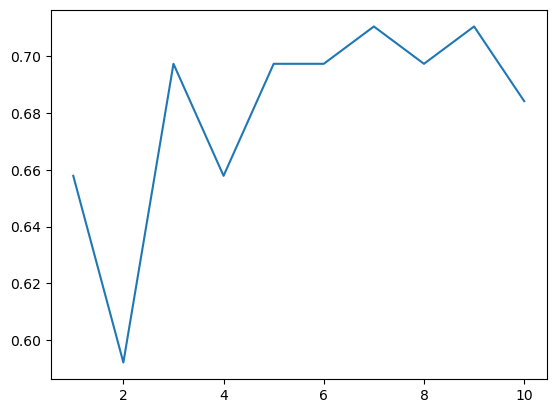

In [49]:
plt.plot(K_range,scores_list)

In [54]:
# Convert the data to a DataFrame
df = pd.DataFrame({
    'Algorithm':['Decision Tree','KNN'],
    'Accuracy':[accuracy_dt,accuracy_Knn]
})

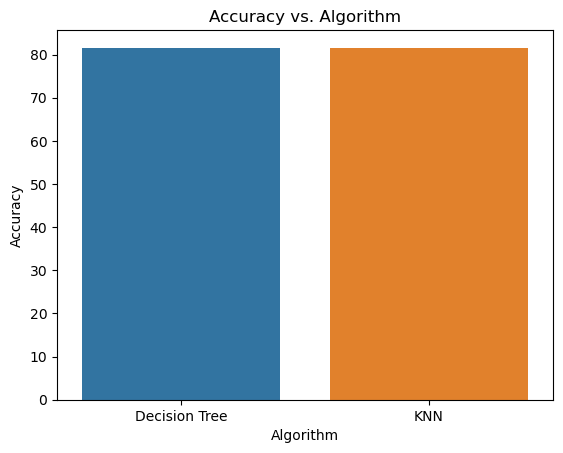

In [55]:
# Create the bar plot
sns.barplot(x=df['Algorithm'], y=df['Accuracy'], data=df)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Algorithm')

#show the plot
plt.show()

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
#train the LogisticRegression model with Training data
model.fit(X_train,Y_train)

c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

Accuracy Score

In [58]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [59]:
print('Accuracy on Training data : ' , training_data_accuracy)

Accuracy on Training data :  0.8546255506607929


In [60]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)


In [61]:
print('Accuracy on Test data : ' , test_data_accuracy)

Accuracy on Test data :  0.8552631578947368


### Logistic regression is performing well on this data as compared to KNN and DecisioN Tree. 

### Building a Predictive system

In [62]:
# inputting a healthy person data
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has Heart Disease')

[0]
The person does not have a Heart Disease


c:\Users\Gurkirtan Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
